In [39]:
import numpy as np
import tqdm
import time
import csv
import cv2
import matplotlib.pyplot as plt
from scipy.ndimage import imread
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

%matplotlib inline


In [40]:
'''
flip_test = np.array(images_center[0:2])
flip_test_angle = np.array(steering_vals[0:2])

flip_test_imgs_res, flip_test_angle_res = flip_imgs(flip_test, flip_test_angle)

final_res = np.append(flip_test, flip_test_imgs_res, axis=0)

print (flip_test.shape)
print (flip_test_imgs_res.shape)
print (final_res.shape)

'''


'\nflip_test = np.array(images_center[0:2])\nflip_test_angle = np.array(steering_vals[0:2])\n\nflip_test_imgs_res, flip_test_angle_res = flip_imgs(flip_test, flip_test_angle)\n\nfinal_res = np.append(flip_test, flip_test_imgs_res, axis=0)\n\nprint (flip_test.shape)\nprint (flip_test_imgs_res.shape)\nprint (final_res.shape)\n\n'

In [41]:
def aws_filename(fnames):
    new_paths =[]
    for fname in fnames:
        source_path = fname
        foldername= source_path.split('/')[-3]
        filename= source_path.split('/')[-1]
        current_path = './collected_data/' + foldername + '/IMG/' + filename
        new_paths.append(current_path)
    return new_paths

def load_imgs_from_path(paths):
    images =[]
    for img_path in paths:
        new_img = cv2.imread(img_path)
        images.append(new_img)
    return images

5342
1336
./collected_data/run4_extra_data_difficult_sections/IMG/center_2017_03_08_20_14_06_722.jpg


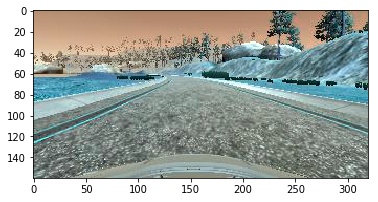

In [42]:
#csv parsing from collected data

fnames = ['./collected_data/run1/driving_log.csv', './collected_data/run2_reverse/driving_log.csv', './collected_data/run3_recover/driving_log.csv', './collected_data/run4_extra_data_difficult_sections/driving_log.csv']
#fnames = ['./collected_data/run1/driving_log.csv', './collected_data/run2_reverse/driving_log.csv', './collected_data/run3_recover/driving_log.csv']
lines = []

for fname in fnames: 
    with open(fname) as csvfile:
        reader = csv.reader(csvfile)
        for line in reader:
           lines.append(line) 

images = []
measurements = []

    
lines = np.array(lines)
lines_train, lines_validation = train_test_split(lines, test_size=0.2)

print (len(lines_train))
print (len(lines_validation))

images_center_path = aws_filename(np.array(lines_train[:,0]))
images_left_path = aws_filename(np.array(lines_train[:,1]))
images_right_path = aws_filename(np.array(lines_train[:,2]))
steering_vals = np.array(lines_train[:,3])
steering_vals = steering_vals.astype(float)
num_train_samples = len(steering_vals)

images_center_path_val = aws_filename(np.array(lines_validation[:,0]))
images_left_path_val = aws_filename(np.array(lines_validation[:,1]))
images_right_path_val = aws_filename(np.array(lines_validation[:,2]))
steering_vals_val = np.array(lines_validation[:,3])
steering_vals_val = steering_vals_val.astype(float)
num_val_samples = len(steering_vals_val)




   
    
print(images_center_path[0])
my_img_path = './collected_data/run1/IMG/center_2017_02_27_21_47_36_087.jpg'
my_img = cv2.imread(my_img_path)
#print (len(images_center))
plt.imshow(my_img)

#images_center = np.array(images_center)
#print (images_center.shape)

#plt.imshow(images_center[0])

In [43]:
def plot_frequency(xlabel, xs, with_names=True):
    # get count number for each class (ys)
    m_classes, ys = np.unique(y_train, return_counts=True)
    fig, ax = plt.subplots(figsize=(15, 12))
    # create bars for each class(xs) and their respective value (ys)
    bars = ax.barh(xs, ys, 1, color='#d62a69', alpha=0.9, edgecolor='k')
    # Print list on the side and class number and count at the end of the bar
    for i,bar in enumerate(bars):
        height = bar.get_y()
        if with_names:
            ax.text(bars[-1].get_width()-(bars[0].get_width()*1)-1200, height,
                '{} - {}'.format(i, xlabel[i]),rotation=0,ha='left', va='center')
        ax.text(bars[i].get_x()+bars[i].get_width()+10, height+bars[i].get_height()/2,
                '({} - {})'.format(i, ys[i]),rotation=0,ha='left', va='center')

    plt.show()

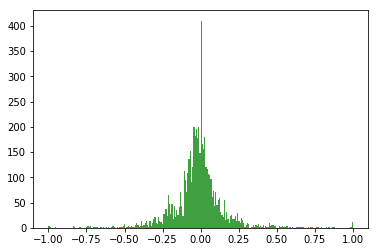

In [44]:
n, bins, patches = plt.hist(steering_vals, 250, facecolor='green', alpha=0.75)

In [45]:
def flip_imgs(images, angles):
    flipped_imgs = []
    flipped_angles = []
    for image, angle in zip(images,angles):
        flipped_imgs.append(cv2.flip(image,1))
        flipped_angles.append(-1.0 * float(angle))
        
    flipped_imgs = np.array(flipped_imgs)
    flipped_angles = np.array(flipped_angles)
    return flipped_imgs, flipped_angles

def flip_angles(angles):
    flipped_angles = []
    for angle in angles:
        flipped_angles.append(-1.0 * float(angle))
    flipped_angles = np.array(flipped_angles)
    return flipped_angles

    
    
def getlr_steering(steering_vals):
    left_steering = []
    right_steering = []
    for steer in steering_vals:
        left_steering.append(0.25 + steer)
        right_steering.append(-0.25 + steer)
    
    return np.array(left_steering), np.array(right_steering)


def generator(imgs_center_paths, imgs_left_paths, imgs_right_paths, all_steering_values, batch_size):
    num_imgs = len(all_steering_values)
    while 1:
        shuffle(imgs_center_paths, imgs_left_paths, imgs_right_paths, all_steering_values)
        for offset in range(0,num_imgs, batch_size):
            images = []
            angles = []
            images_center = load_imgs_from_path(imgs_center_paths[offset:offset+batch_size])
            images_left = load_imgs_from_path(imgs_left_paths[offset:offset+batch_size])
            images_right = load_imgs_from_path(imgs_right_paths[offset:offset+batch_size])
            steering_values = all_steering_values[offset:offset+batch_size]
            
            flipped_images, flipped_angles = flip_imgs(images_center, steering_values)
            left_steering_vals, right_steering_vals = getlr_steering(steering_values)

            X_train = np.append(np.array(images_center), flipped_images, axis=0)
            X_train = np.append(X_train, images_left, axis=0)
            X_train = np.append(X_train, images_right, axis=0)
            y_train = np.append(np.array(steering_values), flipped_angles, axis=0)
            y_train = np.append(y_train, left_steering_vals, axis=0)
            y_train = np.append(y_train, right_steering_vals, axis=0)

            yield shuffle(X_train, y_train)


(5342,)
(21368,)


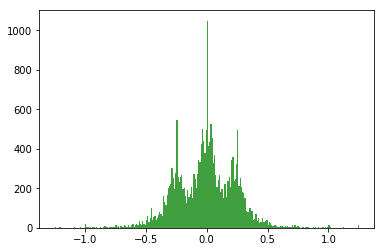

In [46]:


#X_train = np.array(images_center[0:9])
#y_train = np.array(steering_vals[0:9])

gen_angles = steering_vals
print (gen_angles.shape)
flipped_angles = flip_angles(steering_vals)
left_steering_angles, right_steering_angles = getlr_steering(steering_vals)

gen_angles=np.append(gen_angles, flipped_angles)
gen_angles=np.append(gen_angles, left_steering_angles)
gen_angles=np.append(gen_angles, right_steering_angles)



n, bins, patches = plt.hist(gen_angles, 250, facecolor='green', alpha=0.75)

#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

#print (X_train.shape)
print (gen_angles.shape)

In [47]:
m_batch_size=32
train_generator = generator(images_center_path, images_left_path, images_right_path, steering_vals, batch_size=m_batch_size)
validation_generator = generator(images_center_path_val, images_left_path_val, images_right_path_val, steering_vals_val, batch_size=m_batch_size)

In [48]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, Lambda, Cropping2D, Convolution2D

model = Sequential()

model.add(Lambda(lambda x: x/255.0 -0.5, input_shape=(160,320,3)))
model.add(Cropping2D(cropping=((70,25),(0,0))))
model.add(Convolution2D(24,5,5,subsample=(2,2),activation='relu'))
model.add(Convolution2D(36,5,5,subsample=(2,2),activation='relu'))
model.add(Convolution2D(48,5,5,subsample=(2,2),activation='relu'))
model.add(Convolution2D(64,3,3,activation='relu'))
model.add(Convolution2D(64,3,3,activation='relu'))
model.add(Flatten())
model.add(Dense(1000))
model.add(Dropout(0.25))
model.add(Dense(100))
model.add(Dropout(0.25))
model.add(Dense(50))
model.add(Dropout(0.25))
model.add(Dense(10))
model.add(Dropout(0.25))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
num_train_samples *= 4
num_val_samples *= 4
history_object = model.fit_generator(train_generator, samples_per_epoch=num_train_samples, validation_data=validation_generator, nb_val_samples=num_val_samples, nb_epoch=10, verbose=2)

Epoch 1/10
43s - loss: 0.0467 - val_loss: 0.0348
Epoch 2/10
41s - loss: 0.0383 - val_loss: 0.0314
Epoch 3/10
41s - loss: 0.0361 - val_loss: 0.0297
Epoch 4/10
41s - loss: 0.0343 - val_loss: 0.0278
Epoch 5/10
41s - loss: 0.0324 - val_loss: 0.0278
Epoch 6/10
41s - loss: 0.0311 - val_loss: 0.0265
Epoch 7/10
42s - loss: 0.0289 - val_loss: 0.0268
Epoch 8/10
42s - loss: 0.0275 - val_loss: 0.0257
Epoch 9/10
41s - loss: 0.0260 - val_loss: 0.0264
Epoch 10/10
42s - loss: 0.0243 - val_loss: 0.0257


dict_keys(['val_loss', 'loss'])


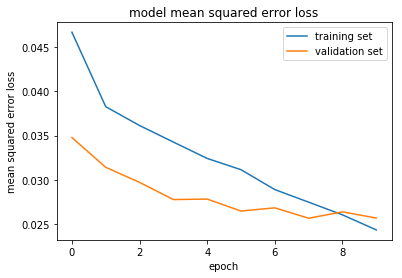

In [49]:
print(history_object.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

In [50]:
model.save('model_v2.h5')